# Week 2
- Loading the dataset 
- Analysing Structure

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("./data/framingham.csv")

In [5]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.shape

(4238, 16)

In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Week 3
- Handling the Missing Values
- Handling the Outliers Values

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [55]:
df = pd.read_csv("./data/framingham.csv")

## Handling Missing Values

**Imputation:** null Imputated data

In [56]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Selecting Numerical and Categorical Columns**

- Categoical columns

In [57]:
categorical_cols = [
    "education",
    "currentSmoker",
    "BPMeds",
    "prevalentStroke",
    "prevalentHyp",
    "diabetes"
]

- Numerical columns

In [58]:
numerical_cols = [
    "cigsPerDay",
    "totChol",
    "BMI",
    "heartRate",
    "glucose"
]

**Imputation:** Categorical Attributes (Mode)

In [59]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

**output:** Categorical Attributed Imputated

In [60]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Imputation:** Numerical Attributes (Median)

In [61]:
num_imputer = SimpleImputer(strategy="median")

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])


**output:** Categorical Attributed Imputated

In [62]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Handling Outlier Values

**Outlier Dectection:** Numerical attributes

- Using Boxplot

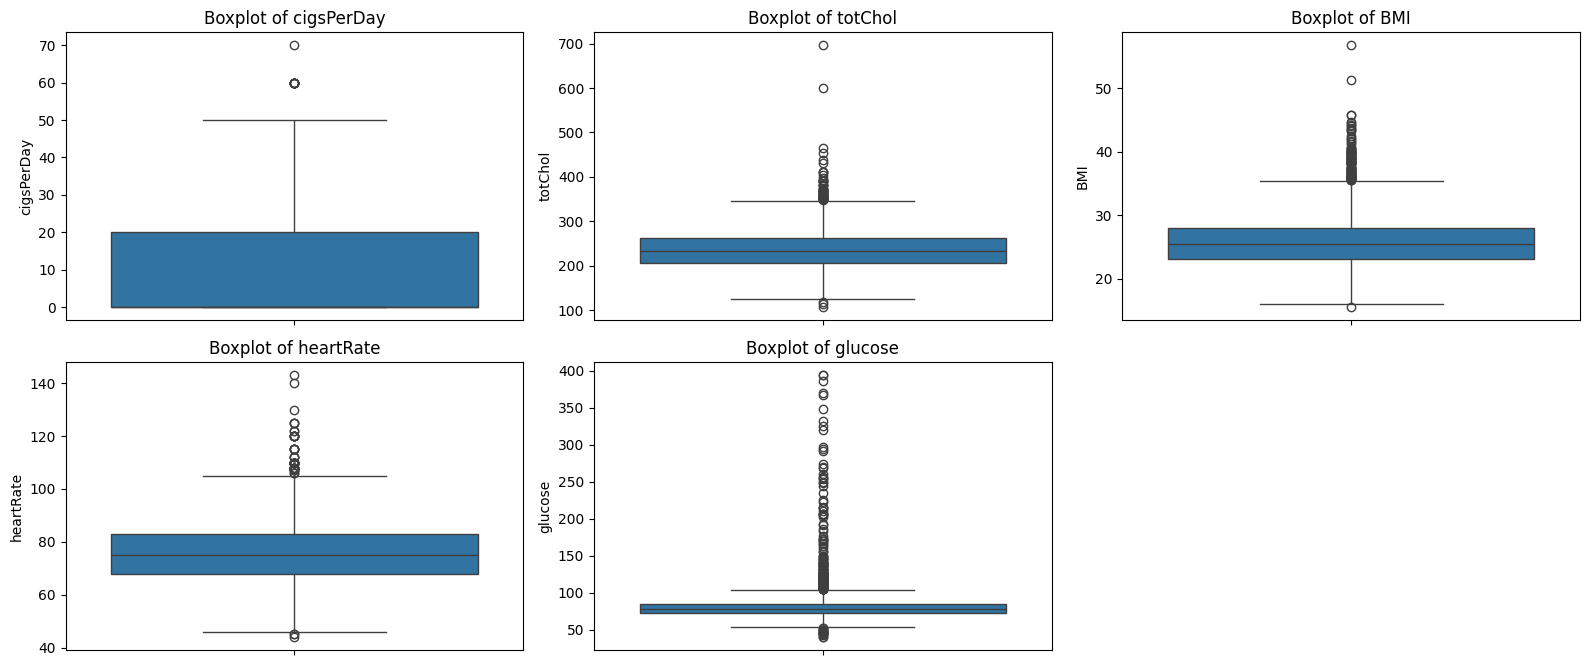

In [63]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


- Using Z-Score

In [64]:
z_scores = df[numerical_cols].apply(zscore)

outliers = (np.abs(z_scores) > 3)

outlier_count = outliers.sum()
outlier_count


cigsPerDay    21
totChol       25
BMI           60
heartRate     23
glucose       50
dtype: int64

**Outlier Fixing:** Numerical attributes

- Outlirs Columns 

In [67]:
outlier_cols = [
    "cigsPerDay",
    "totChol",
    "BMI",
    "heartRate",
    "glucose"
]

- IQR Capping Function

In [68]:
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower_bound, upper_bound)

- Apply Capping to Each Attribute

In [69]:
for col in outlier_cols:
    iqr_capping(df, col)

- Verify Outliers After Treatment

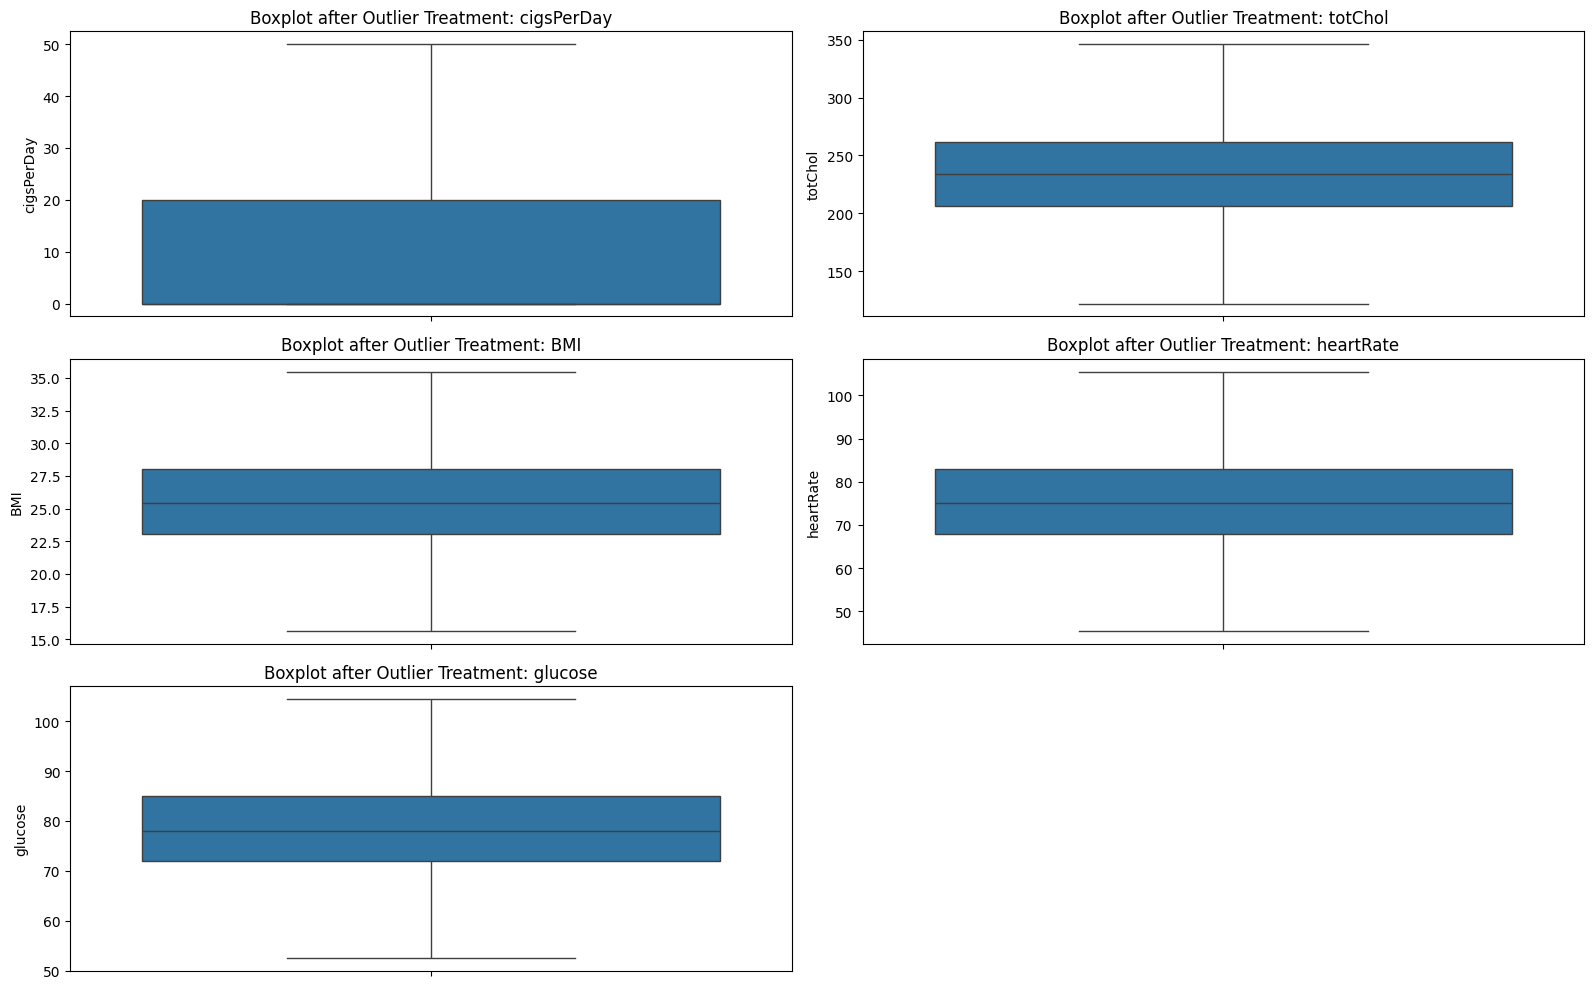

In [70]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot after Outlier Treatment: {col}")

plt.tight_layout()
plt.show()

# Week 4
- Univariate and Bivariate analysis.
- Visualizing distributions. 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/framingham.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Variaten Analysis

### Univariate Analysis

**Why we use Univariate Analysis**<br/>
- To understand the individual behavior of each variable
- To detect skewness, outliers, and imbalance
<br/>

**What is relevant for this dataset**
- Identify imbalance in TenYearCHD
- Study distributions of clinical features such as blood pressure, glucose, BMI
- Detect abnormal medical values

**TenYearCHD Distribution**

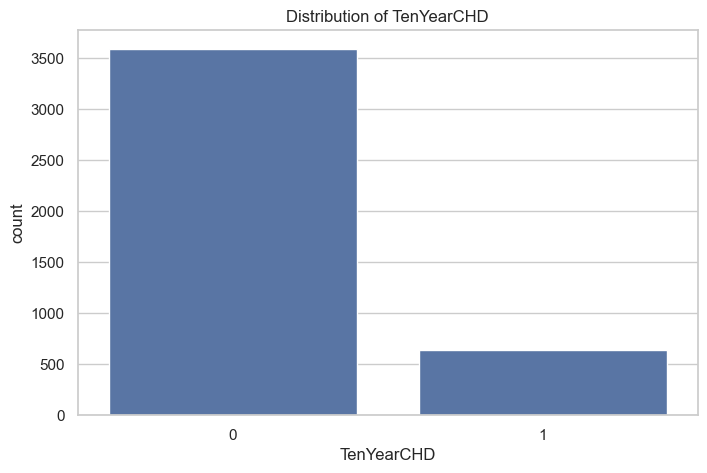

In [16]:
sns.countplot(x='TenYearCHD', data=df)
plt.title("Distribution of TenYearCHD")
plt.show()

**Continuous Variable Distribution**

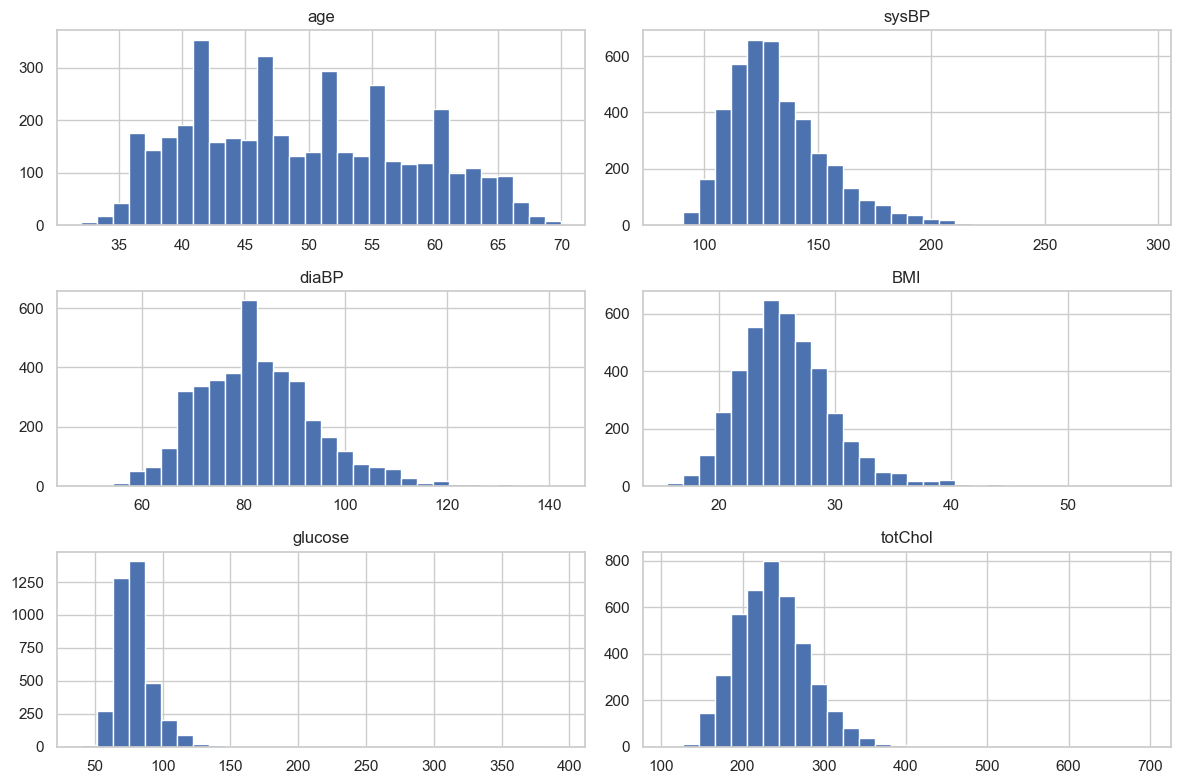

In [17]:
num_cols = ['age', 'sysBP', 'diaBP', 'BMI', 'glucose', 'totChol']

df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

**Univariate Observations**<br/>

- age, BMI, glucose show right-skewed distributions

- sysBP and diaBP are approximately normal

- Outliers present in glucose and cholesterol

### Bivariate Analysis

**Why we use Bivariate Analysis**

- To study relationship between features and target

- To identify risk factors

**What is relevant for this dataset**

- Clinical measurements vs CHD

- Lifestyle factors vs CHD


**Numerical Feature vs Target**

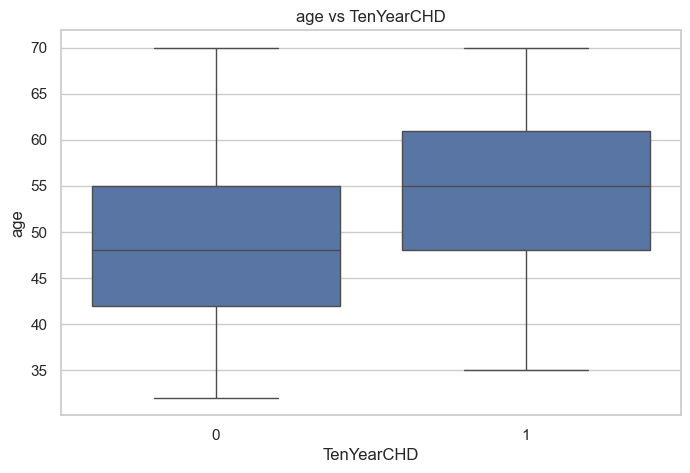

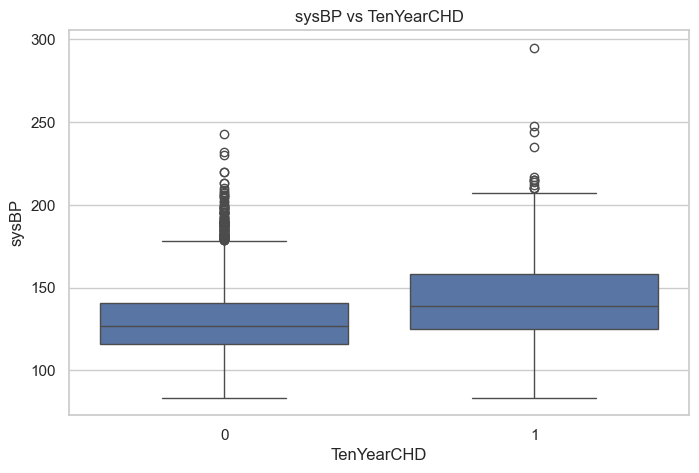

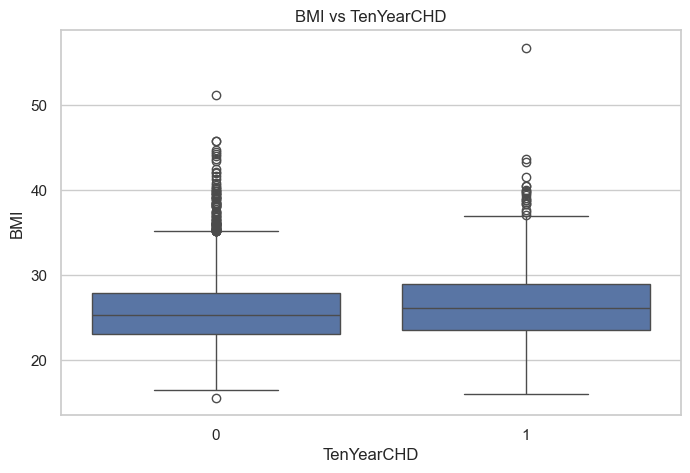

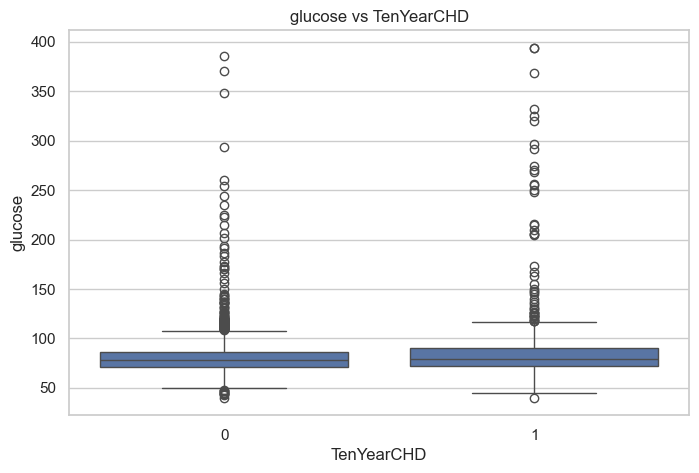

In [18]:
for col in ['age', 'sysBP', 'BMI', 'glucose']:
    sns.boxplot(x='TenYearCHD', y=col, data=df)
    plt.title(f"{col} vs TenYearCHD")
    plt.show()

**Categorical Feature vs Target**

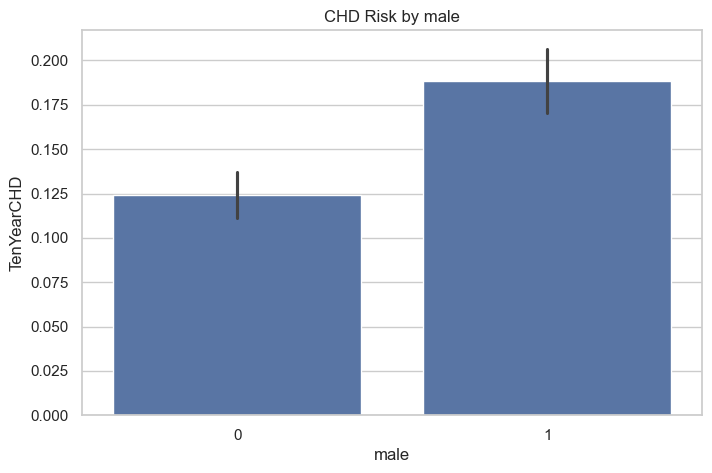

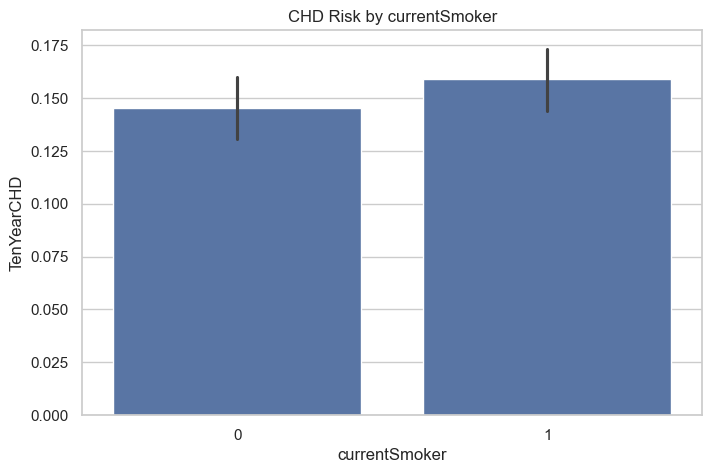

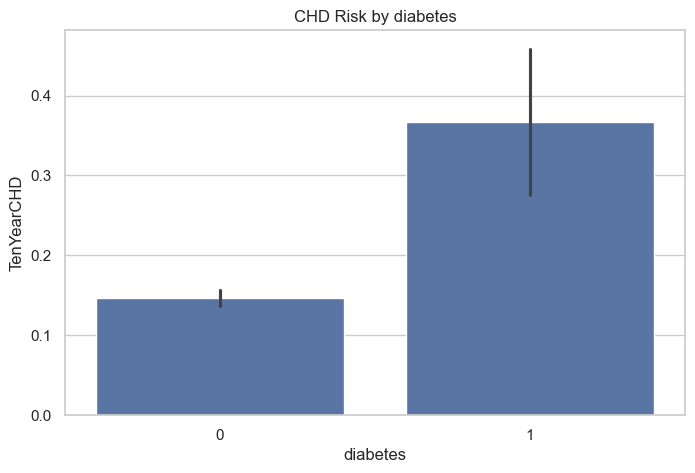

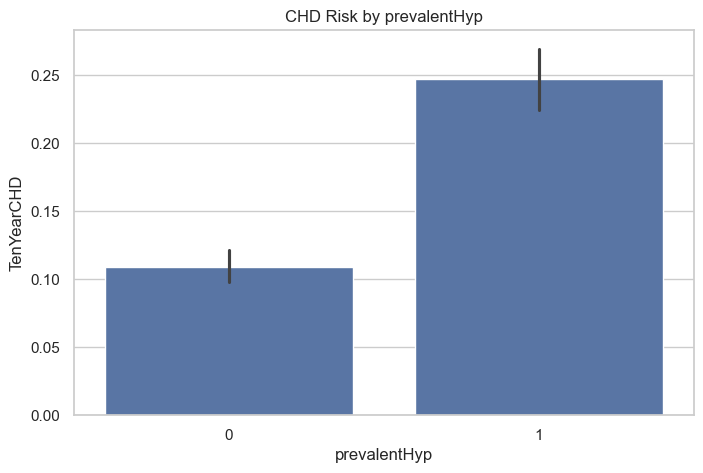

In [19]:
cat_cols = ['male', 'currentSmoker', 'diabetes', 'prevalentHyp']

for col in cat_cols:
    sns.barplot(x=col, y='TenYearCHD', data=df)
    plt.title(f"CHD Risk by {col}")
    plt.show()

**Bivariate Observations**

- CHD patients have higher median age and blood pressure

- Diabetes and hypertension show strong association with CHD

- Smoking increases CHD probability

### Multivariate Analysis

**Why we use Multivariate Analysis**
- To detect interactions among variables

- To identify multicollinearity

- To support dimensionality reduction

**What is relevant for this dataset**

- Blood pressure variables correlation

- Metabolic risk clustering

- Feature redundancy before modeling

**Correlation Matrix**

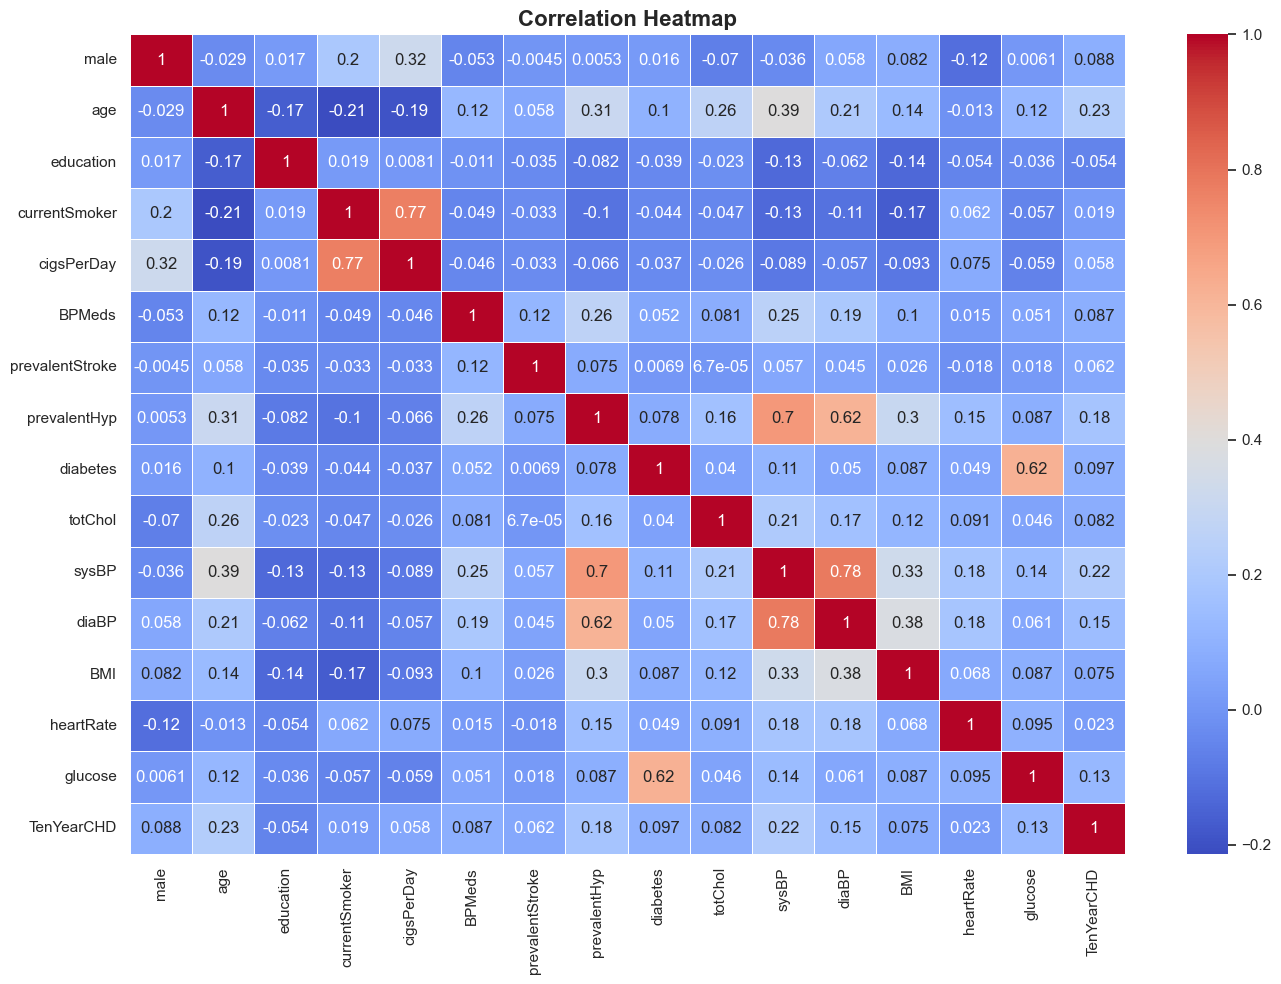

In [27]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df.corr(),
    mask=None,
    cmap='coolwarm',
    linewidths=0.5,
    annot=True
)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


**Multivariate Observations**
- Strong correlation between sysBP and diaBP

- BMI and glucose are positively correlated

- Multicollinearity exists and affects linear models

## Distribution Analysis

**KDE Distribution by Target**

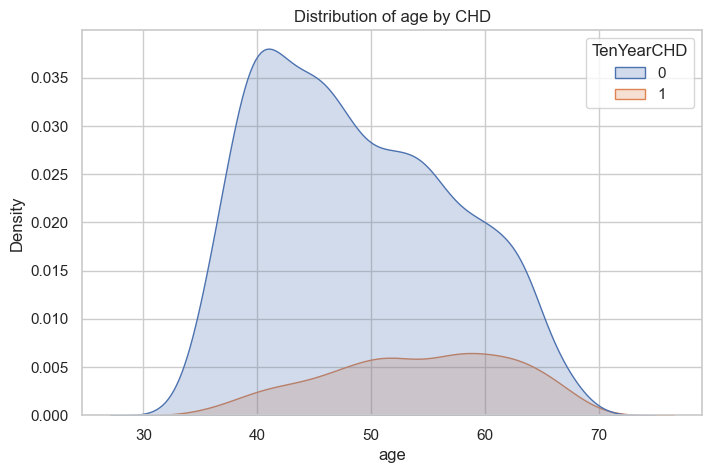

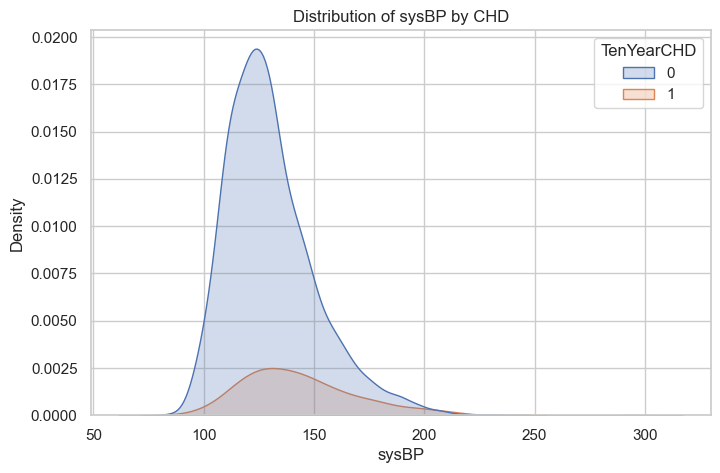

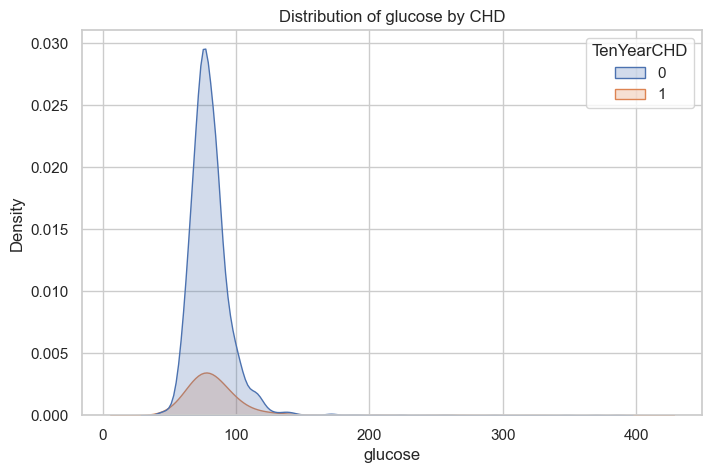

In [29]:
for col in ['age', 'sysBP', 'glucose']:
    sns.kdeplot(data=df, x=col, hue='TenYearCHD', fill=True)
    plt.title(f"Distribution of {col} by CHD")
    plt.show()

## Dimensionality Reduction (PCA)

**PCA Implementation**

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['TenYearCHD'] = y

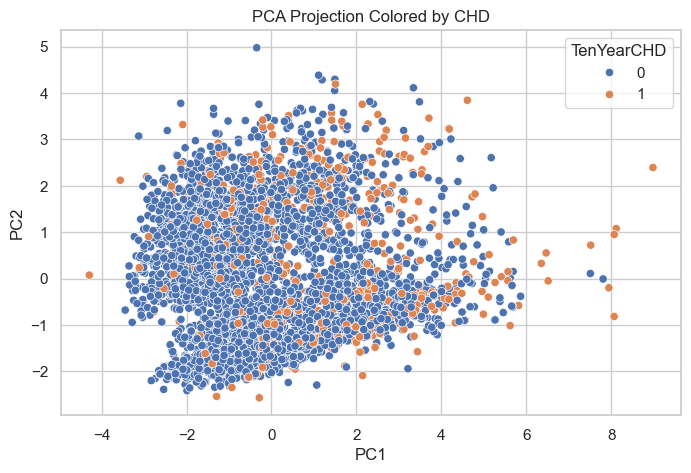

In [37]:
sns.scatterplot(x='PC1', y='PC2', hue='TenYearCHD', data=pca_df)
plt.title("PCA Projection Colored by CHD")
plt.show()